# Análise sobre as despesas com marketing - Empresa Y.Afisha

# Conteúdo <a id='back'></a>

* [1) Objetivo do Projeto](#projectgoal)
* [2) Preparação de Dados](#data_preprocessing)
* [3) Cálculo das métricas e relatórios](#metricsandreports)
* [4) Vendas](#sales)
* [4) Marketing](#marketing)
* [5) Conclusões Gerais](#end)

# Objetivo do Projeto

O objetivo desse projeto é é ajudar a empresa a otimizar suas despesas com marketing, utilizando dados do servidor com os acessos a Y.Afisha de janeiro de 2017 até dezembro de 2018, arquivo de despejo com todos os pedidos feitos durante o período e as estatísticas de despesas com marketing. 

Será analisado como as pessoas usam o produto e começam a comprar. O dinheiro que cada cliente traz para a empresa e quando as despesas serão cobertas.

# Preparação de Dados

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats # Carregando todas as bibliotecas

In [2]:
visits_df = pd.read_csv('/datasets/visits_log_us.csv', sep = ',',  dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'],) # Carregando o arquivo de dados em DataFrame e corrigindo o tipo de dados
orders_df = pd.read_csv('/datasets/orders_log_us.csv', sep = ',', parse_dates=['Buy Ts'],)
costs_df = pd.read_csv('/datasets/costs_us.csv', sep = ',', parse_dates=['dt'],)

In [3]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [4]:
visits_df.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [5]:
# Declarando um dicionário com os nomes antigos das colunas como as chaves
# e os novos nomes de colunas como os valores
columns_new ={
    "Device": "device",
    "End Ts": "end_ts",
    "Source Id": "source_id",
    "Start Ts": "start_ts",
    "Uid": "uid"
    }

# Chamando o método rename e passando
# o dicionário como um argumento para o parâmetro columns
visits_df = visits_df.rename(columns = columns_new)
print(visits_df.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [7]:
orders_df.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [8]:
# Declarando um dicionário com os nomes antigos das colunas como as chaves
# e os novos nomes de colunas como os valores
columns_new ={
    "Buy Ts": "buy_ts",
    "Revenue": "revenue",
    "Uid": "uid"
    }

# Chamando o método rename e passando
# o dicionário como um argumento para o parâmetro columns
orders_df = orders_df.rename(columns = columns_new)
print(orders_df.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [9]:
costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [10]:
costs_df.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [11]:
print(visits_df.isna().sum()) #calculando o número de valores ausentes de visits_df
print()
print(orders_df.isna().sum()) #calculando o número de valores ausentes de orders_df
print()
print(costs_df.isna().sum()) #calculando o número de valores ausentes de costs_df

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

buy_ts     0
revenue    0
uid        0
dtype: int64

source_id    0
dt           0
costs        0
dtype: int64


In [12]:
print(visits_df.duplicated().sum()) #Contando duplicados explícitos de visits_df
print()
print(orders_df.duplicated().sum()) #Contando duplicados explícitos de orders_df
print()
print(costs_df.duplicated().sum()) #Contando duplicados explícitos de costs_df

0

0

0


Não foram encontrados dados duplicados ou ausentes em nenhum dos 3 DF's, e os tipos dados foram convertidos de acordo com a necessidade. E Conforme as boas práticas de estilo, transformamos os nomes das colunas em letras minúsculas para evitar erros dos Data Frames "visits" e "costs", e preenchendo " " por "_" nos nomes das colunas dos mesmos.

# Cálculo das métricas e relatórios

Produto
 
* Quantas pessoas usam-no cada dia, semana e mês?
* Quantas sessões ocorrem por dia? (um usuário pode realizar várias sessões).
* Que comprimento tem cada sessão?
* Com que frequência os usuários voltam?

In [13]:
# Convertendo colunas de timestamp para datetime
visits_df['start_ts'] = pd.to_datetime(visits_df['start_ts'])
visits_df['end_ts'] = pd.to_datetime(visits_df['end_ts'])


# Adicionando colunas de data para cálculo de métricas diárias, semanais e mensais
visits_df['date'] = visits_df['start_ts'].dt.date
visits_df['week'] = visits_df['start_ts'].dt.to_period('W').apply(lambda r: r.start_time)
visits_df['month'] = visits_df['start_ts'].dt.to_period('M').apply(lambda r: r.start_time)
visits_df['year'] = visits_df['start_ts'].dt.year

# Calculando o número de usuários únicos por dia, semana e mês
daily_users = visits_df.groupby('date')['uid'].nunique()
weekly_users = visits_df.groupby('week')['uid'].nunique()
monthly_users = visits_df.groupby('month')['uid'].nunique()

print(daily_users.head())
print()
print(weekly_users.head())
print()
print(monthly_users.head())


date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: uid, dtype: int64

week
2017-05-29    2021
2017-06-05    4129
2017-06-12    2812
2017-06-19    2878
2017-06-26    3064
Name: uid, dtype: int64

month
2017-06-01    13259
2017-07-01    14183
2017-08-01    11631
2017-09-01    18975
2017-10-01    29692
Name: uid, dtype: int64


In [14]:
daily_sessions = visits_df.groupby('date').size()

print(daily_sessions)

date
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Length: 364, dtype: int64


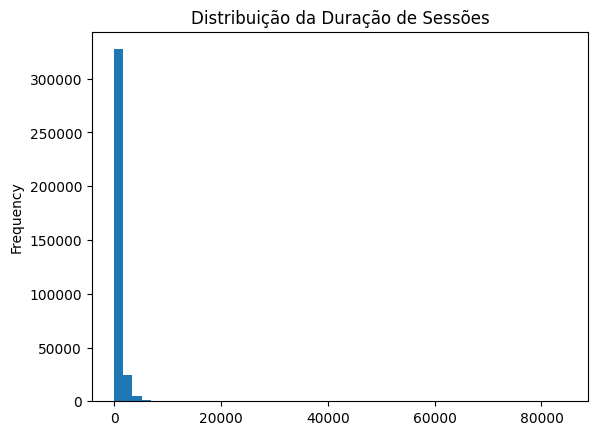

In [15]:
visits_df['session_duration_sec'] = (visits_df['end_ts'] - visits_df['start_ts']).dt.seconds # Calculando a duração de cada sessão

visits_df['session_duration_sec'].plot(kind = 'hist', bins = 50, title = 'Distribuição da Duração de Sessões', xlabel= 'Duração da Sessão (segundos)', ylabel = 'Frequência')

plt.show()

As durações das sessões não estão distribuídas uniformemente. Portanto, vamos calcular a média das sessões por dia(DAU - Usuários ativos diários), por semana(WAU - Usuários ativos semanais) e por mês(MAU - Usuários ativos mensais). 

In [16]:
dau_total = visits_df.groupby('date').agg({'uid': 'nunique'}).mean()
wau_total = visits_df.groupby(['year', 'week']).agg({'uid': 'nunique'}).mean()
mau_total = visits_df.groupby(['year', 'month']).agg({'uid': 'nunique'}).mean()

print(f'Média Diária das Sessões: {int(dau_total)}')
print(f'Média Semanal das Sessões: {int(wau_total)}')
print(f'Média Mensal das Sessões: {int(mau_total)}')

Média Diária das Sessões: 907
Média Semanal das Sessões: 5716
Média Mensal das Sessões: 23228


A taxa de retenção é uma métrica que informa a fidelidade do público – com que frequência eles retornam acessar o nosso site. E por isso, vamos calcular abaixo: 

In [17]:
week_retention = dau_total/wau_total*100
month_retention = dau_total/mau_total*100

print(f'Taxa de Retenção Semanal: {int(week_retention)}%')
print(f'Taxa de Retenção Mensal: {int(month_retention)}%')

Taxa de Retenção Semanal: 15%
Taxa de Retenção Mensal: 3%


Apenas 15% dos usuários que visitam o produto em uma semana voltam a usá-lo na semana seguinte. Isso indica que a maioria dos usuários não retorna regularmente de uma semana para outra. A baixa taxa de retenção semanal pode sugerir que os usuários não estão encontrando valor suficiente no produto para retornar regularmente. Há uma grande oportunidade de melhorar o engajamento semanal, talvez através de campanhas de reengajamento, melhorias no produto ou oferecendo incentivos para que os usuários retornem.

Apenas 3% dos usuários que visitam o produto em um mês voltam a usá-lo no mês seguinte. Isso indica uma retenção ainda mais baixa a longo prazo, e é um sinal de alerta significativo. Isso pode indicar problemas graves na capacidade do produto de manter os usuários engajados por períodos mais longos. É crucial tomar medidas para entender por que os usuários não estão retornando mensalmente. Isso pode envolver a coleta de feedback dos usuários, análise de dados de uso, e a implementação de melhorias no produto ou na estratégia de marketing.

# Vendas
 

In [18]:
orders_df['buy_ts'] = pd.to_datetime(orders_df['buy_ts'])# Convertendo colunas de timestamp para datetime


visits_df['start_ts'] = pd.to_datetime(visits_df['start_ts'])
visits_df['end_ts'] = pd.to_datetime(visits_df['end_ts'])

In [19]:
first_access = visits_df.groupby('uid')['start_ts'].min().reset_index() # Calculando a data do primeiro acesso de cada usuário
first_access.columns = ['uid', 'first_access']

print(first_access.head(10))

               uid        first_access
0   11863502262781 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00
5  397399764396656 2018-01-18 12:32:00
6  407573351275847 2017-06-17 13:40:00
7  498809019029702 2018-02-21 22:09:00
8  526778907996220 2017-10-21 17:51:00
9  577434573913691 2018-01-28 14:15:00


In [20]:
orders_with_first_access = orders_df.merge(first_access, on='uid')# Unindo o DataFrame de compras e o DataFrame de primeiro acesso

orders_with_first_access['days_to_conversion'] = (orders_with_first_access['buy_ts'] - orders_with_first_access['first_access']).dt.days # Calculando o intervalo entre o primeiro acesso e a compra

orders_with_first_access['conversion_category'] = pd.cut(orders_with_first_access['days_to_conversion'], bins=[-1, 0, 1, 7, 30, 90, 180, 365], labels=['0d', '1d', '1w', '1m', '3m', '6m', '1y']) # Categorizando o intervalo em dias

print(orders_with_first_access.head(10))

               buy_ts  revenue                   uid        first_access  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:09:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:14:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:25:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:14:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:31:00   
5 2017-06-01 08:43:00     0.18  10402394430196413321 2017-06-01 08:43:00   
6 2017-06-01 08:54:00     1.83  12464626743129688638 2017-06-01 08:51:00   
7 2017-06-05 14:30:00     7.33  12464626743129688638 2017-06-01 08:51:00   
8 2017-06-01 09:22:00     1.22   3644482766749211722 2017-06-01 09:22:00   
9 2017-06-02 12:44:00     0.85   3644482766749211722 2017-06-01 09:22:00   

   days_to_conversion conversion_category  
0                   0                  0d  
1                   0                  0d  
2                   0          

Formamos coortes de usuários com base na primeira data de compra. Também aprendemos que a quantidade de novos consumidores está decaindo com o passar do tempo. Agora, será importante analisar os coortes por mês de compra para determinar quantos pedidos os clientes fazem durante um determinado esse período de tempo.

In [21]:
orders_with_first_access['cohort_month'] = orders_with_first_access['first_access'].dt.to_period('M') # Adicionando colunas de ano e mês do primeiro acesso

# Criando a tabela dinâmica
cohort_analysis = pd.pivot_table(
    orders_with_first_access,
    index='cohort_month',
    columns='conversion_category',
    values='uid',
    aggfunc='nunique'
).fillna("")

# Exibir a tabela dinâmica
print(cohort_analysis)

conversion_category    0d   1d   1w   1m   3m   6m   1y
cohort_month                                           
2017-06              1804   81  172  196  277  504  635
2017-07              1526   74  149  135  283  359  413
2017-08              1097   39  100  126  230  237  215
2017-09              1966  101  240  305  424  364  215
2017-10              3302  164  348  446  534  495  182
2017-11              2866  196  384  489  523  420   63
2017-12              2992  158  353  318  426  275    0
2018-01              2326  121  244  289  283  125    0
2018-02              2482  116  278  290  218   63    0
2018-03              2369  121  186  212  160    0    0
2018-04              1557   82  154  150   68    0    0
2018-05              2076   90  124   80    0    0    0


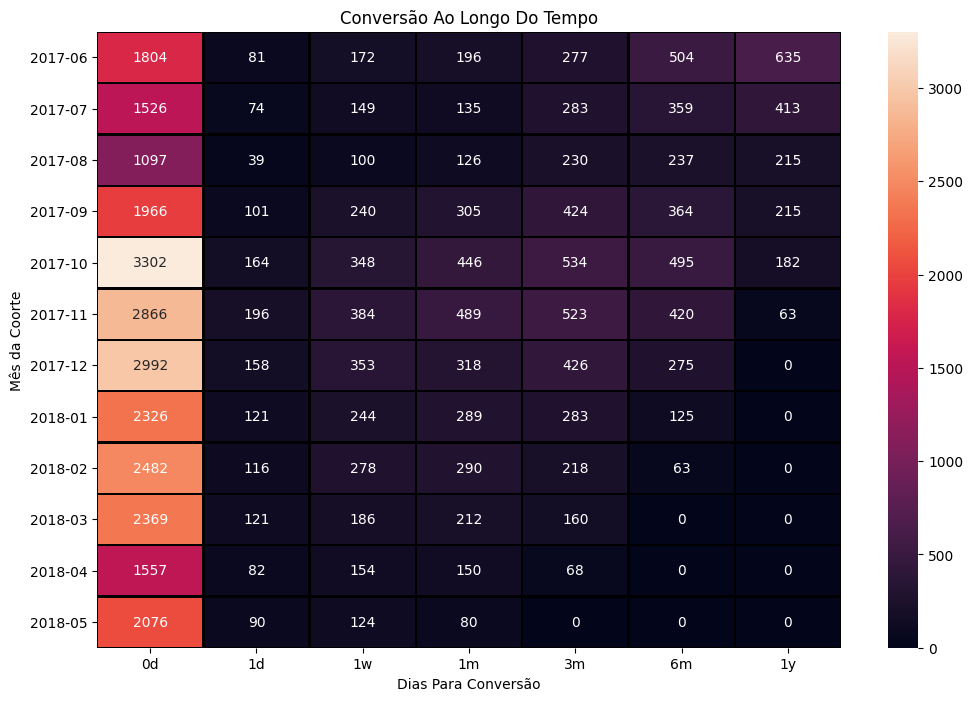

In [22]:
plt.figure(figsize=(12, 8)) # Criando o heatmap

sns.heatmap(cohort_analysis, annot=True, fmt=".0f", linewidths=1, linecolor='black')

plt.title('Conversão Ao Longo Do Tempo')
plt.xlabel('Dias Para Conversão')
plt.ylabel('Mês da Coorte')

plt.show()

Os códigos acima permitem formar coortes de usuários com base na primeira data de compra e analisar o número de pedidos feitos por cada coorte em cada mês subsequente. Com essa análise, podemos determinar padrões de comportamento de compra ao longo do tempo e avaliar a eficiência das estratégias de retenção de clientes.

O gráfico de calor (heatmap) que você forneceu ilustra a análise de coorte, mostrando quantos usuários de cada mês de coorte converteram ao longo do tempo. 

A maioria dos usuários que se convertem tendem a fazê-lo no mesmo dia em que acessam o site pela primeira vez. Há um rápido declínio nas conversões após o primeiro dia, com muito poucas conversões ocorrendo após um mês. Certos meses (por exemplo, outubro de 2017) foram mais eficazes em atrair conversões rápidas do que outros, sugerindo que campanhas de marketing ou outros fatores nesses meses foram particularmente bem-sucedidos.

Dado que a maioria das conversões ocorre no mesmo dia, investir em estratégias para maximizar a conversão imediata pode ser altamente benéfico.

Agora, vamos calcular o volume total das compras. 

In [23]:
total_order_value = orders_df['revenue'].sum() # Calculando o volume total das compras

print(f'Volume Total das Compras: {total_order_value}')

Volume Total das Compras: 252057.19999999998


In [24]:
total_orders = orders_df.shape[0] # Calculando o número total de compras

print(f'Número Total de Compras: {total_orders}')

Número Total de Compras: 50415


In [25]:
average_order_value = total_order_value / total_orders # Calculando a média do volume de uma compra

print(f'Volume Médio de uma Compra: {average_order_value}')

Volume Médio de uma Compra: 4.999646930477041


Com base no volume médio de uma compra de aproximadamente $5.00, podemos tirar várias conclusões importantes sobre o comportamento do consumidor e a eficácia das estratégias de vendas e marketing da empresa. 

Para finalizar a análise sobre os dados de venda, precisamos calcular o Valor de Tempo de Vida do Cliente (LTV ou CLV, do inglês "Customer Lifetime Value"), precisamos considerar várias métricas e parâmetros. O LTV estima o valor total que um cliente traz para a empresa ao longo do seu relacionamento com a empresa. O cálculo básico envolve os seguintes componentes:
* Ticket Médio de Compra (AOV - Average Order Value);
* Frequência Média de Compra (Purchase Frequency);
* Taxa de Retenção (Retention Rate);
* Tempo Médio de Vida do Cliente (Customer Lifetime).

In [26]:
orders_df['order_date'] = pd.to_datetime(orders_df['buy_ts']) #Convertendo as datas para os tipos de dados corretos e acrescente as colunas do mês da encomenda e da despesa mensal.
costs_df['dt'] = pd.to_datetime(costs_df['dt'])

orders_df['order_month'] = orders_df['order_date'].astype('datetime64[M]')
costs_df['month'] = costs_df['dt'].astype('datetime64[M]')

In [27]:
#calculando o número de clientes, por mês da primeira compra
first_orders = orders_df.groupby('uid').agg({'order_month': 'min'}).reset_index() # Descubrindo o mês em que o primeiro pedido de cada cliente foi feito
first_orders.columns = ['uid', 'first_order_month']
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index() # calculando a quantidade de pessoas que fez seu primeiro pedido
cohort_sizes.columns = ['first_order_month', 'n_buyers']

print(cohort_sizes.head())

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


In [28]:
margin_rate = 0.4

orders = pd.merge(orders_df,first_orders, on='uid') # somando o mês da primeira encomenda ao DataFrame com as compras
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()# agrupando as encomendas em coortes
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [29]:
report['gp'] =  report['revenue'] * margin_rate # calculando o lucro bruto
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')# descubrindo a idade de cada coorte em meses
report['ltv'] = report['gp'] / report['n_buyers'] # calculando o LTV para as coortes

result = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round() # calculando os valores para a tabela dinâmica

result = result.fillna('')

print(result)

age                 0    1    2    3    4    5    6    7    8    9    10   11
first_order_month                                                            
2017-06-01         2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2017-07-01         2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     
2017-08-01         2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0          
2017-09-01         2.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0               
2017-10-01         2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0                    
2017-11-01         2.0  0.0  0.0  0.0  0.0  0.0  0.0                         
2017-12-01         2.0  0.0  0.0  0.0  0.0  0.0                              
2018-01-01         2.0  0.0  0.0  0.0  0.0                                   
2018-02-01         2.0  0.0  0.0  0.0                                        
2018-03-01         2.0  0.0  0.0                                             
2018-04-01         2.0  0.0                                     

Há uma taxa de atrito alta, já que o número de clientes diminui rapidamente com o passar dos meses. Devido à alta taxa de churn, o valor vitalício médio do cliente provavelmente será baixo a moderado. Para aumentar o LTV e garantir a rentabilidade a longo prazo, a empresa deve focar em reduzir o CAC(Custo de Aquisição de Clientes), aumentar o o volume médio por compra, melhorar a retenção de clientes e continuar inovando e oferecendo valor aos clientes. Com essas estratégias, a empresa pode melhorar seu desempenho financeiro e fortalecer sua posição no mercado.

# Marketing


Para analisar quanto dinheiro foi gasto em marketing, precisamos examinar os dados de custos de marketing. Especificamente, queremos calcular os custos totais, os custos por origem e os custos ao longo do tempo.

Essa análise permite que a empresa tome decisões informadas sobre como alocar seu orçamento de marketing de maneira mais eficiente e eficaz, maximizando o retorno sobre o investimento.

* Custo Total por Origem: Representa o total gasto em marketing para cada origem de anúncio.
* Número de Clientes Adquiridos por Origem: Mostra quantos clientes foram adquiridos através de cada origem de anúncio.
* CAC por Origem: Calcula o CAC dividindo o custo total pelo número de clientes adquiridos para cada origem.

In [30]:
monthly_costs = costs_df.groupby('month').sum()
report_ = pd.merge(
    report, monthly_costs, left_on='first_order_month', right_on='month'
)
report_['cac'] = report_['costs'] / report_['n_buyers']

report_['romi'] = report_['ltv'] / report_['cac']
result= report_.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

print(result.cumsum(axis=1).round(2).fillna(''))# imprimindo a tabela dinâmica com o ROMI acumulado calculado

age                  0     1     2     3     4     5     6     7     8     9   \
first_order_month                                                               
2017-06-01         1.89  2.08  2.26  2.64  3.05  3.34  3.72  3.96  4.18  4.42   
2017-07-01         2.40  2.54  2.79  2.93   3.0  3.06  3.11  3.17  3.23  3.29   
2017-08-01         2.11   2.3  2.48  2.64  2.84  2.95  3.03   3.2  3.31  3.39   
2017-09-01         2.26   2.7  2.91   4.5  4.66  4.92   5.2   5.3  5.37         
2017-10-01         2.00  2.22  2.29  2.36  2.42  2.46   2.5  2.54               
2017-11-01         2.06  2.22   2.3  2.43  2.49  2.51  2.56                     
2017-12-01         1.90   2.0  2.37   2.8  2.92  3.06                           
2018-01-01         1.65  1.77  1.89  1.95  1.98                                 
2018-02-01         1.66  1.77  1.81  1.84                                       
2018-03-01         1.94  2.06  2.18                                             
2018-04-01         1.86  2.0

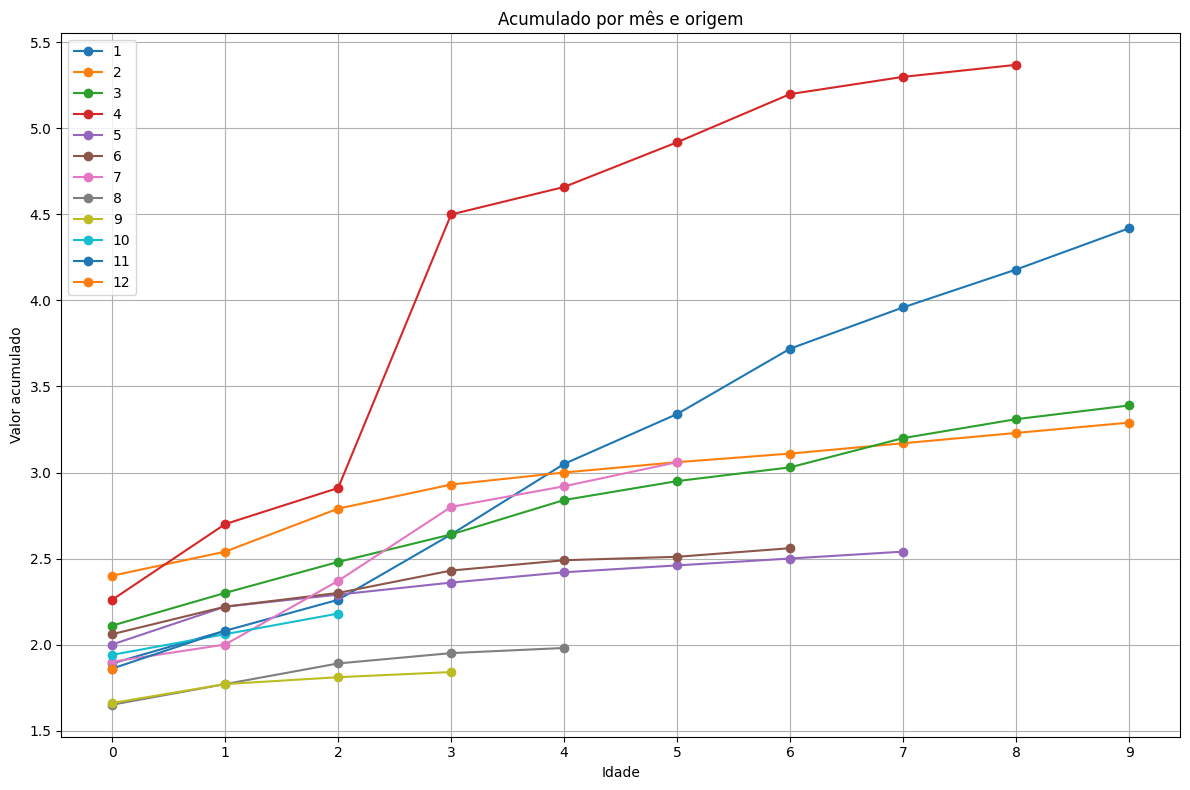

In [31]:
data = {
    'age': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    '1': [1.89, 2.08, 2.26, 2.64, 3.05, 3.34, 3.72, 3.96, 4.18, 4.42],
    '2': [2.40, 2.54, 2.79, 2.93, 3.0, 3.06, 3.11, 3.17, 3.23, 3.29],
    '3': [2.11, 2.3, 2.48, 2.64, 2.84, 2.95, 3.03, 3.2, 3.31, 3.39],
    '4': [2.26, 2.7, 2.91, 4.5, 4.66, 4.92, 5.2, 5.3, 5.37, None],
    '5': [2.0, 2.22, 2.29, 2.36, 2.42, 2.46, 2.5, 2.54, None, None],
    '6': [2.06, 2.22, 2.3, 2.43, 2.49, 2.51, 2.56, None, None, None],
    '7': [1.9, 2.0, 2.37, 2.8, 2.92, 3.06, None, None, None, None],
    '8': [1.65, 1.77, 1.89, 1.95, 1.98, None, None, None, None, None],
    '9': [1.66, 1.77, 1.81, 1.84, None, None, None, None, None, None],
    '10': [1.94, 2.06, 2.18, None, None, None, None, None, None, None],
    '11': [1.86, 2.08, None, None, None, None, None, None, None, None],
    '12': [1.86, None, None, None, None, None, None, None, None, None],
}

df = pd.DataFrame(data)

df.set_index('age', inplace=True)


plt.figure(figsize=(12, 8))# Plotando o gráfico de área acumulado por mês
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', linestyle='-', label=column)

plt.title('Acumulado por mês e origem')
plt.xlabel('Idade')
plt.ylabel('Valor acumulado')
plt.xticks(df.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
m6_cum_ltv = result.cumsum(axis=1).mean(axis=0)[5] # determinando o LTV acumulado por 6 meses a partir do momento em que o primeiro pedido foi realizado
print('LVT médio aos 6 meses após a primeira encomenda:', m6_cum_ltv)

LVT médio aos 6 meses após a primeira encomenda: 3.1876210520829344


Para cobrir os investimentos com marketing, a aquisição de um cliente não pode custar mais do que $3.1876.

In [33]:
costs_df['dt'] = pd.to_datetime(costs_df['dt'])# Convertendo colunas de timestamp para datetime, se necessário

In [34]:
total_customers = orders_df['uid'].nunique()# Calculando o número total de clientes adquiridos (únicos)

print(f'Número Total de Clientes Adquiridos: {total_customers}')

Número Total de Clientes Adquiridos: 36523


In [35]:
total_revenue = orders_df['revenue'].sum()# Calculando a Receita Total

print(f'Receita Total: ${total_revenue:.2f}')

Receita Total: $252057.20


In [36]:
total_marketing_cost = costs_df['costs'].sum()# Calculando o Custo Total de Marketing

print(f'Custo Total de Marketing: ${total_marketing_cost:.2f}')

Custo Total de Marketing: $329131.62


In [37]:
global_cac = total_marketing_cost / total_customers # Calculando o CAC global

print(f'Custo de Aquisição de Clientes (CAC) Global: ${global_cac:.2f}')

Custo de Aquisição de Clientes (CAC) Global: $9.01



Custo por Origem:
   source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49


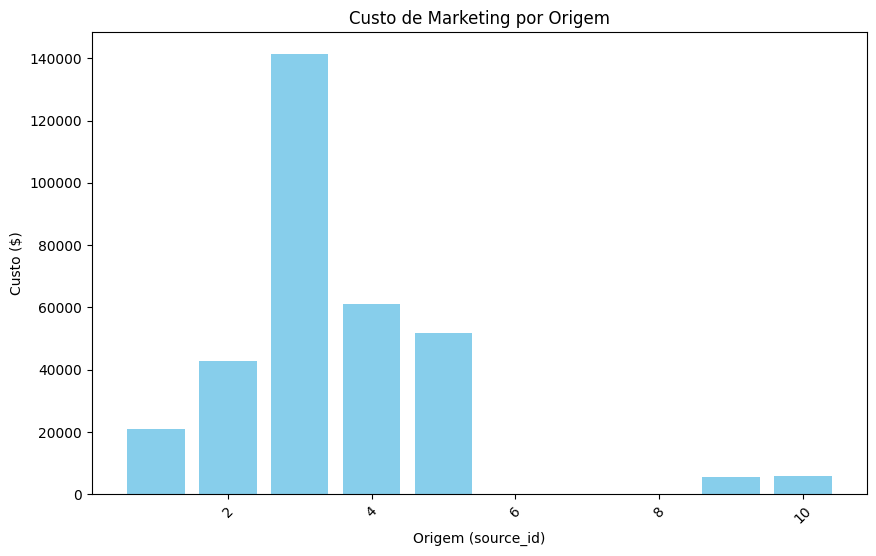

In [38]:
cost_by_source = costs_df.groupby('source_id')['costs'].sum().reset_index() # Calculando o Custo por Origem
print('\nCusto por Origem:')
print(cost_by_source)

plt.figure(figsize=(10, 6))
plt.bar(cost_by_source['source_id'], cost_by_source['costs'], color='skyblue')
plt.xlabel('Origem (source_id)')
plt.ylabel('Custo ($)')
plt.title('Custo de Marketing por Origem')
plt.xticks(rotation=45)
plt.show()

Os dados acima identificam quais canais de marketing são mais caros. Isso pode ajudar a empresa a avaliar a eficiência de cada canal e otimizar o orçamento de marketing.


Custo ao Longo do Tempo:
      month     costs
0   2017-06  18015.00
1   2017-07  18240.59
2   2017-08  14790.54
3   2017-09  24368.91
4   2017-10  36322.88
5   2017-11  37907.88
6   2017-12  38315.35
7   2018-01  33518.52
8   2018-02  32723.03
9   2018-03  30415.27
10  2018-04  22289.38
11  2018-05  22224.27


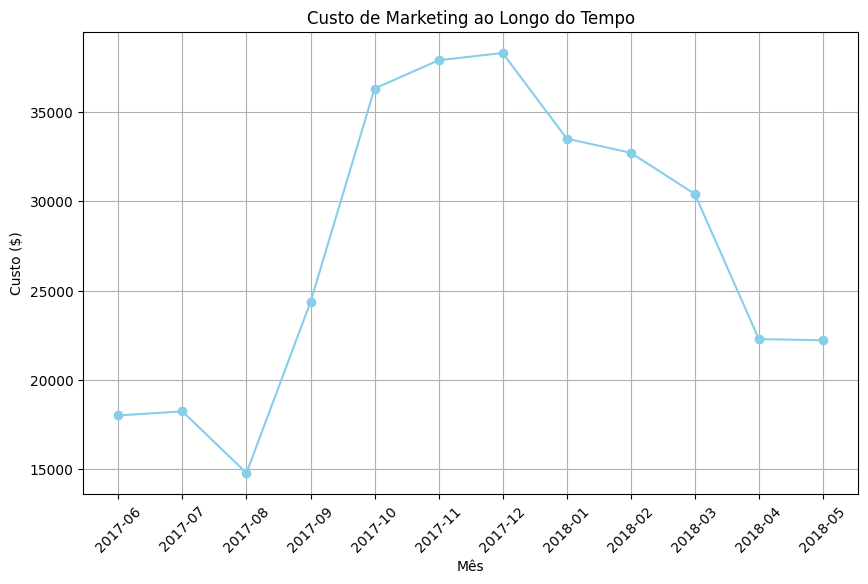

In [39]:
costs_df['month'] = costs_df['dt'].dt.to_period('M') # caulculando o Custo ao Longo do Tempo (agregado por mês)
cost_over_time = costs_df.groupby('month')['costs'].sum().reset_index()
print('\nCusto ao Longo do Tempo:')
print(cost_over_time)


plt.figure(figsize=(10, 6))
plt.plot(cost_over_time['month'].astype(str), cost_over_time['costs'], marker='o', color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Custo ($)')
plt.title('Custo de Marketing ao Longo do Tempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Os dados analisam como os custos de marketing variam ao longo do tempo, o que pode ajudar a identificar padrões sazonais ou picos de gasto. Isso pode ser útil para planejar futuras campanhas de marketing e alocar o orçamento de forma mais eficaz.

Origens com menores CAC são extremamente eficientes em termos de custo para adquirir novos clientes. A empresa pode considerar investir mais nessas fontes para maximizar a eficiência do gasto em marketing.

Já as com maiores CAC são muito mais caras para adquirir clientes. A empresa deve investigar o porquê deste custo elevado. Pode ser que a qualidade dos leads seja maior ou que o retorno por cliente (LTV) justifique o custo elevado.

Logo, o ideal seria considerar aumentar o investimento nas origens com menor CAC se esses clientes forem igualmente valiosos em termos de LTV, e reduzir ou otimizar gastos nas origens com maior CAC.

* Análise de ROI:

Agora, vamos comparar o LTV com o CAC para determinar o retorno sobre o investimento (ROI) das suas campanhas de marketing. O anúncio é eficaz se os usuários gerarem mais dinheiro do que a empresa gasta para atraí-los.

ROI da campanha publicitária = (receita − despesas) / despesas.

In [40]:
roi = ((total_revenue - total_marketing_cost) / total_marketing_cost) * 100 # Calculando o ROI

print(f'Retorno sobre Investimento (ROI): {roi:.2f}%')

Retorno sobre Investimento (ROI): -23.42%


Um Retorno sobre Investimento (ROI) de -23,42% é um indicativo claro de que os investimentos em marketing não estão gerando retornos positivos. O gráfico de ROI por origem e por mês pode ajudar a identificar quais fontes de tráfego são menos rentáveis e em quais meses o desempenho foi pior. 

In [45]:
# Adicionando colunas de período (mês e ano)
orders_df['month'] = orders_df['buy_ts'].dt.to_period('M').astype(str)
costs_df['month'] = costs_df['dt'].dt.to_period('M').astype(str)

# Calculando a receita total por mês
revenue_by_month = orders_df.groupby('month')['revenue'].sum().reset_index()
revenue_by_month.columns = ['month', 'total_revenue']

# Calculando o custo total de marketing por origem e mês
cost_by_source_month = costs_df.groupby(['source_id', 'month'])['costs'].sum().reset_index()
cost_by_source_month.columns = ['source_id', 'month', 'total_cost']

# Unindo a receita total com os custos
roi_df = pd.merge(cost_by_source_month, revenue_by_month, on='month', how='outer')
roi_df['total_cost'] = roi_df['total_cost'].fillna(0)  # Preencher valores NaN com 0
roi_df['total_revenue'] = roi_df['total_revenue'].fillna(0)  # Preencher valores NaN com 0

# Calculando a proporção da receita para cada origem
roi_df['revenue_proportion'] = roi_df['total_cost'] / roi_df['total_cost'].sum()
roi_df['attributed_revenue'] = roi_df['revenue_proportion'] * roi_df['total_revenue']

# Calculando o ROI por origem e mês
roi_df['roi'] = (roi_df['attributed_revenue'] - roi_df['total_cost']) / roi_df['total_cost'] * 100

# Exibir os resultados
print('\nROI por Origem e Mês:')
print(roi_df)


ROI por Origem e Mês:
    source_id    month  total_cost  total_revenue  revenue_proportion  \
0         1.0  2017-06     1125.61        9557.49            0.003420   
1         2.0  2017-06     2427.38        9557.49            0.007375   
2         3.0  2017-06     7731.65        9557.49            0.023491   
3         4.0  2017-06     3514.80        9557.49            0.010679   
4         5.0  2017-06     2616.12        9557.49            0.007949   
..        ...      ...         ...            ...                 ...   
80        4.0  2018-05     4214.21       20735.98            0.012804   
81        5.0  2018-05     3669.56       20735.98            0.011149   
82        9.0  2018-05      362.17       20735.98            0.001100   
83       10.0  2018-05      409.86       20735.98            0.001245   
84        NaN  2018-06        0.00           3.42            0.000000   

    attributed_revenue        roi  
0            32.686031 -97.096150  
1            70.487485 -97.0

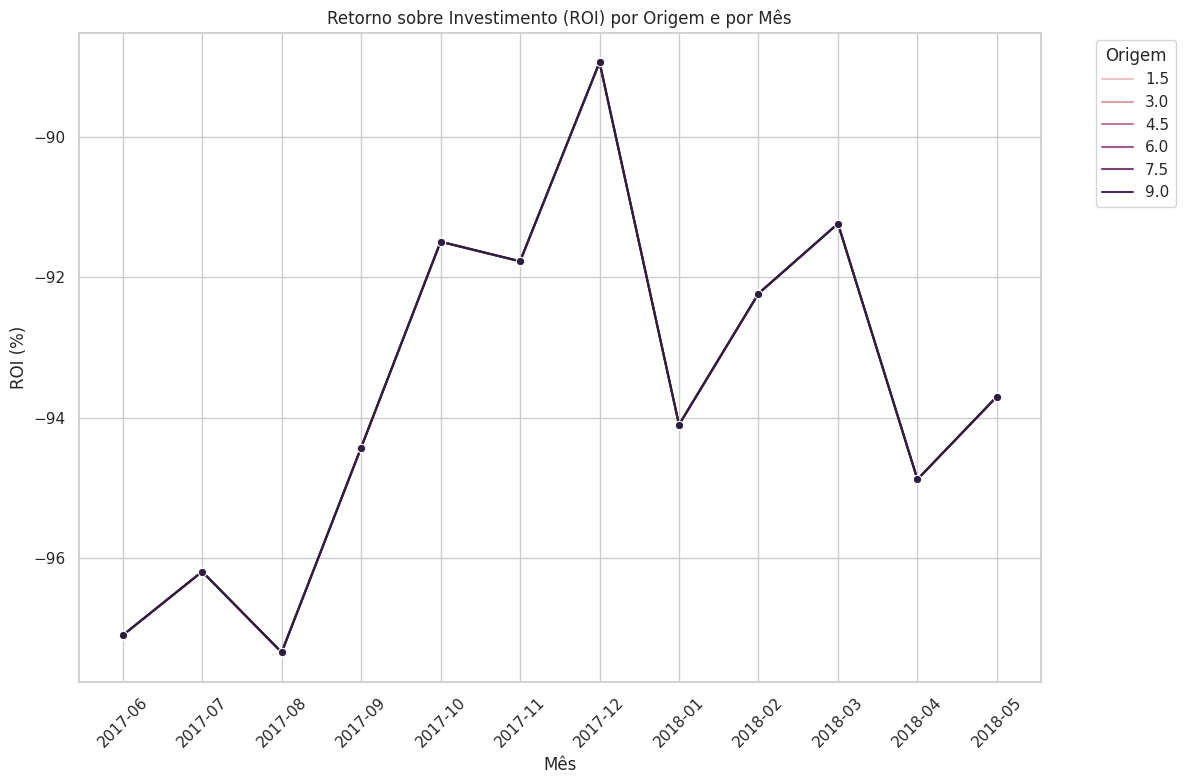

In [47]:
sns.set(style="whitegrid")


plt.figure(figsize=(12, 8)) # Criando o gráfico de linha para o ROI por origem e mês
sns.lineplot(data=roi_df, x='month', y='roi', hue='source_id', marker='o')
plt.title('Retorno sobre Investimento (ROI) por Origem e por Mês')
plt.xlabel('Mês')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45)
plt.legend(title='Origem', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

O gráfico mostra a evolução do Retorno sobre Investimento (ROI) por diferentes origens ao longo do tempo. Podemos concluir que o ROI permanece consistentemente negativo ao longo de todo o período analisado. Isso significa que, em nenhum momento, os investimentos em marketing geraram um retorno positivo, indicando uma necessidade urgente de revisar as estratégias de marketing. Existe uma variação significativa no ROI de mês para mês.Fatores sazonais, promoções específicas ou outras variáveis podem estar influenciando essas flutuações. Embora o gráfico não identifique claramente as diferentes origens, parece que todas elas seguem um padrão similar.

# Conclusões Gerais 

Este projeto envolveu a análise dos dados de visitas, pedidos e custos associados a diferentes origens de marketing, com o objetivo de entender o desempenho das campanhas de marketing e fornecer recomendações para futuras alocações de orçamento. As principais métricas analisadas incluíram a frequência de uso do produto, o volume médio de compras, o LTV (Lifetime Value), o custo de aquisição de clientes (CAC) e o Retorno sobre Investimento (ROI).

* Recomendações de Investimento 

Dado o ROI consistentemente negativo, é essencial revisar as estratégias de marketing atuais. As campanhas e canais que estão apresentando os piores desempenhos devem ser identificados e, possivelmente, descontinuados ou drasticamente modificados.Considerando o alto CAC e o baixo LTV, recomenda-se focar em canais de marketing de menor custo e potencialmente alto impacto, como: SEO (Search Engine Optimization), Marketing de Conteúdo, Email Marketing.
Investir em melhorar a experiência do usuário no site pode aumentar a satisfação do cliente, melhorar as taxas de retenção e, consequentemente, aumentar o LTV. Implementar programas de fidelidade pode incentivar compras repetidas e aumentar o engajamento dos clientes.

Com essas mudanças, a empresa pode esperar melhorar seu ROI e, eventualmente, gerar um retorno positivo sobre seus investimentos em marketing.